# Introduction
## This data was taken from: https://www.kaggle.com/datasets/airbnb/seattle/data  for Seattle.
## https://www.kaggle.com/datasets/airbnb/boston/data for Boston
## It features various data regarding Boston and Seattle Airbnb properties, prices, neighborhoods, and reviews/review scores (amongst other aspects) from 2009 to 2016.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
## Importing the Boston dataset with chosen columns (originally 95 columns from kaggle.com)
df_boston = pd.read_csv("/Users/seanward/Desktop/UDACITY/Data Science Project/Original Data Sets/listings.csv", usecols=['id', 'host_id', 'host_name', 'street', 'neighbourhood_cleansed', 'price', 'city', 'latitude', 'longitude', 'property_type', 'bathrooms', 'bedrooms', 'amenities', 'price', 'number_of_reviews', 'review_scores_rating']) 

In [3]:
## Looking at the Dataset
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3585 non-null   int64  
 1   host_id                 3585 non-null   int64  
 2   host_name               3585 non-null   object 
 3   street                  3585 non-null   object 
 4   neighbourhood_cleansed  3585 non-null   object 
 5   city                    3583 non-null   object 
 6   latitude                3585 non-null   float64
 7   longitude               3585 non-null   float64
 8   property_type           3582 non-null   object 
 9   bathrooms               3571 non-null   float64
 10  bedrooms                3575 non-null   float64
 11  amenities               3585 non-null   object 
 12  price                   3585 non-null   object 
 13  number_of_reviews       3585 non-null   int64  
 14  review_scores_rating    2772 non-null   

In [4]:
df_boston.head()

,id,host_id,host_name,street,neighbourhood_cleansed,city,latitude,longitude,property_type,bathrooms,bedrooms,amenities,price,number_of_reviews,review_scores_rating
0,12147973,31303940,Virginia,"Birch Street, Boston, MA 02131, United States",Roslindale,Boston,42.282619,-71.133068,House,1.5,2.0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,0,NaN
1,3075044,2572247,Andrea,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Boston,42.286241,-71.134374,Apartment,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,36,94.0
2,6976,16701,Phil,"Ardale St., Boston, MA 02131, United States",Roslindale,Boston,42.292438,-71.135765,Apartment,1.0,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,41,98.0
3,1436513,6031442,Meghna,"Boston, MA, United States",Roslindale,Boston,42.281106,-71.121021,House,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,1,100.0
4,7651065,15396970,Linda,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,Boston,42.284512,-71.136258,House,1.5,1.0,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,29,99.0


In [5]:
## Importing Seattle dataset with same columns as Boston
df_seattle = pd.read_csv("/Users/seanward/Desktop/UDACITY/Data Science Project/Original Data Sets/Seattle_listings.csv", usecols=['id', 'host_id', 'host_name', 'street', 'neighbourhood_cleansed', 'price', 'city', 'latitude', 'longitude', 'property_type', 'bathrooms', 'bedrooms', 'amenities', 'price', 'number_of_reviews', 'review_scores_rating']) 

In [6]:
## Looking at the dataset
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3818 non-null   int64  
 1   host_id                 3818 non-null   int64  
 2   host_name               3816 non-null   object 
 3   street                  3818 non-null   object 
 4   neighbourhood_cleansed  3818 non-null   object 
 5   city                    3818 non-null   object 
 6   latitude                3818 non-null   float64
 7   longitude               3818 non-null   float64
 8   property_type           3817 non-null   object 
 9   bathrooms               3802 non-null   float64
 10  bedrooms                3812 non-null   float64
 11  amenities               3818 non-null   object 
 12  price                   3818 non-null   object 
 13  number_of_reviews       3818 non-null   int64  
 14  review_scores_rating    3171 non-null   

In [7]:
df_seattle.head()

,id,host_id,host_name,street,neighbourhood_cleansed,city,latitude,longitude,property_type,bathrooms,bedrooms,amenities,price,number_of_reviews,review_scores_rating
0,241032,956883,Maija,"Gilman Dr W, Seattle, WA 98119, United States",West Queen Anne,Seattle,47.636289,-122.371025,Apartment,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,207,95.0
1,953595,5177328,Andrea,"7th Avenue West, Seattle, WA 98119, United States",West Queen Anne,Seattle,47.639123,-122.365666,Apartment,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,43,96.0
2,3308979,16708587,Jill,"West Lee Street, Seattle, WA 98119, United States",West Queen Anne,Seattle,47.629724,-122.369483,House,4.5,5.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,20,97.0
3,7421966,9851441,Emily,"8th Avenue West, Seattle, WA 98119, United States",West Queen Anne,Seattle,47.638473,-122.369279,Apartment,1.0,0.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,0,NaN
4,278830,1452570,Emily,"14th Ave W, Seattle, WA 98119, United States",West Queen Anne,Seattle,47.632918,-122.372471,House,2.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,38,92.0


# Three Questions:
## 1. What are the most expensive neighborhoods for Airbnb for Boston/Seattle and how do they compare ?

## 2. Which of the most expensive Airbnb neighborhoods have the best reviewed properties between Boston and Seattle?

## 3. Which city has more Airbnb reviews, the best overall reviews, and the highest average prices?


## Data Wrangling (Both Boston and Seattle Datasets)

In [8]:
## Looking for Null values for each column (Boston)
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3585 non-null   int64  
 1   host_id                 3585 non-null   int64  
 2   host_name               3585 non-null   object 
 3   street                  3585 non-null   object 
 4   neighbourhood_cleansed  3585 non-null   object 
 5   city                    3583 non-null   object 
 6   latitude                3585 non-null   float64
 7   longitude               3585 non-null   float64
 8   property_type           3582 non-null   object 
 9   bathrooms               3571 non-null   float64
 10  bedrooms                3575 non-null   float64
 11  amenities               3585 non-null   object 
 12  price                   3585 non-null   object 
 13  number_of_reviews       3585 non-null   int64  
 14  review_scores_rating    2772 non-null   

In [9]:
## Considering the questions that I have proposed, there are columns that I can drop 
df_boston.drop(columns = ["street", "property_type", "bathrooms", "bedrooms", "amenities"], inplace=True)

In [10]:
## Checking the different values for 'city' to see if I can make it universal as just 'Boston' 
## which will be easier when comparing it to 'Seattle.'
df_boston['city'].value_counts()

Boston                       3381
Roxbury Crossing               24
Somerville                     19
Jamaica Plain                  18
Brookline                      18
Cambridge                      16
Brighton                       15
Dorchester                     15
Charlestown                    15
Allston                        12
Roslindale                      6
West Roxbury                    5
ROXBURY CROSSING                4
Mattapan                        3
East Boston                     3
Jamaica Plain, Boston           2
Hyde Park                       2
Jamaica Plain                   2
Boston, Massachusetts, US       2
ALLSTON                         2
South Boston                    2
boston                          1
Mission Hill, Boston            1
Boston (Jamaica Plain)          1
South End, Boston               1
Jamaica Plain, MA               1
Jamaica plain                   1
Roslindale, Boston              1
Brighton                        1
Watertown     

In [11]:
## Changing all city values to 'Boston'
df_boston['city'] = 'Boston'
df_boston['city'].value_counts()

Boston    3585
Name: city, dtype: int64

In [12]:
## Trying to replace the $ as part of price so that it can be recognized as an integer.
df_boston['price'] = df_boston['price'].replace('[\$,]', '', regex=True).astype(float)

In [13]:
df_boston['price'].value_counts()

150.0    144
200.0    117
100.0    101
250.0     95
75.0      94
        ... 
241.0      1
211.0      1
132.0      1
599.0      1
999.0      1
Name: price, Length: 324, dtype: int64

In [14]:
df_boston['neighbourhood_cleansed'].value_counts()

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Mattapan                    24
Bay Village                 24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [15]:
## Data wrangling the Seattle dataset
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3818 non-null   int64  
 1   host_id                 3818 non-null   int64  
 2   host_name               3816 non-null   object 
 3   street                  3818 non-null   object 
 4   neighbourhood_cleansed  3818 non-null   object 
 5   city                    3818 non-null   object 
 6   latitude                3818 non-null   float64
 7   longitude               3818 non-null   float64
 8   property_type           3817 non-null   object 
 9   bathrooms               3802 non-null   float64
 10  bedrooms                3812 non-null   float64
 11  amenities               3818 non-null   object 
 12  price                   3818 non-null   object 
 13  number_of_reviews       3818 non-null   int64  
 14  review_scores_rating    3171 non-null   

In [16]:
## Considering the questions that I have proposed, there are columns that I can drop 
df_seattle.drop(columns = ["street", "property_type", "bathrooms", "bedrooms", "amenities"], inplace=True)

In [17]:
## Checking the different values for 'city' to see if I can make it universal as just 'Seattle' 
## which will be easier when comparing it to 'Boston.'
df_seattle['city'].value_counts()

Seattle                  3810
West Seattle                2
Seattle                     2
Ballard, Seattle            1
西雅图                         1
Phinney Ridge Seattle       1
seattle                     1
Name: city, dtype: int64

In [18]:
df_seattle['city'] = 'Seattle'
df_seattle['city'].value_counts()

Seattle    3818
Name: city, dtype: int64

In [19]:
## Trying to replace the $ as part of price so that it can be recognized as an integer.
df_seattle['price'] = df_seattle['price'].replace('[\$,]', '', regex=True).astype(float)

In [20]:
df_seattle['price'].value_counts()

150.0    162
100.0    159
75.0     118
95.0     110
99.0     110
        ... 
207.0      1
254.0      1
178.0      1
186.0      1
775.0      1
Name: price, Length: 273, dtype: int64

In [21]:
## Merging the datasets into one
df_merged = pd.concat([df_boston, df_seattle], ignore_index=True)

In [22]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7403 non-null   int64  
 1   host_id                 7403 non-null   int64  
 2   host_name               7401 non-null   object 
 3   neighbourhood_cleansed  7403 non-null   object 
 4   city                    7403 non-null   object 
 5   latitude                7403 non-null   float64
 6   longitude               7403 non-null   float64
 7   price                   7403 non-null   float64
 8   number_of_reviews       7403 non-null   int64  
 9   review_scores_rating    5943 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 578.5+ KB


In [23]:
df_merged.head()

,id,host_id,host_name,neighbourhood_cleansed,city,latitude,longitude,price,number_of_reviews,review_scores_rating
0,12147973,31303940,Virginia,Roslindale,Boston,42.282619,-71.133068,250.0,0,NaN
1,3075044,2572247,Andrea,Roslindale,Boston,42.286241,-71.134374,65.0,36,94.0
2,6976,16701,Phil,Roslindale,Boston,42.292438,-71.135765,65.0,41,98.0
3,1436513,6031442,Meghna,Roslindale,Boston,42.281106,-71.121021,75.0,1,100.0
4,7651065,15396970,Linda,Roslindale,Boston,42.284512,-71.136258,79.0,29,99.0


## Question 1: What are the most expensive neighborhoods for Boston/Seattle and how do they compare?

In [24]:
# Looking at how many neighborhoods Boston has and how many Airbnbs are in them.
df_boston['neighbourhood_cleansed'].value_counts()

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Mattapan                    24
Bay Village                 24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [25]:
## Looking at averages by neighborhood (price, number of reviews, review scores)
df_boston_neigh = df_boston.groupby(by=['neighbourhood_cleansed']).mean()

In [26]:
df_boston_neigh

,id,host_id,latitude,longitude,price,number_of_reviews,review_scores_rating
neighbourhood_cleansed,,,,,,,
Allston,9.949958e+06,2.750066e+07,42.354466,-71.130624,112.307692,11.492308,90.164835
Back Bay,8.012314e+06,2.297638e+07,42.349465,-71.081209,240.950331,14.533113,91.531646
Bay Village,9.089334e+06,2.780161e+07,42.349222,-71.068435,266.833333,10.041667,93.000000
Beacon Hill,8.095280e+06,2.440778e+07,42.359034,-71.067850,224.443299,21.123711,93.378698
Brighton,8.938194e+06,3.261171e+07,42.347561,-71.150239,118.767568,16.497297,90.864662
Charlestown,8.981856e+06,2.361482e+07,42.379216,-71.066982,198.045045,17.846847,93.697368
Chinatown,9.832464e+06,2.615385e+07,42.350481,-71.061289,232.352113,9.422535,92.121951
Dorchester,7.713704e+06,2.306330e+07,42.304301,-71.062219,91.639405,27.494424,89.280000
Downtown,8.841361e+06,2.207683e+07,42.356562,-71.061080,236.459302,14.738372,92.432203


In [28]:
## Making the index into it's own column to be used in visualizations
df_boston_neigh['neighbourhood_cleansed'] = df_boston_neigh.index

In [32]:
## Sorting the average prices in descending order
df_boston_neigh =  df_boston_neigh.sort_values(["price"], ascending=False)

In [33]:
df_boston_neigh

,id,host_id,latitude,longitude,price,number_of_reviews,review_scores_rating,neighbourhood_cleansed
neighbourhood_cleansed,,,,,,,,
South Boston Waterfront,1.056695e+07,3.072798e+07,42.348804,-71.045027,306.060241,8.963855,94.431034,South Boston Waterfront
Bay Village,9.089334e+06,2.780161e+07,42.349222,-71.068435,266.833333,10.041667,93.000000,Bay Village
Leather District,7.293484e+06,1.450077e+07,42.351241,-71.058040,253.600000,13.800000,98.333333,Leather District
Back Bay,8.012314e+06,2.297638e+07,42.349465,-71.081209,240.950331,14.533113,91.531646,Back Bay
Downtown,8.841361e+06,2.207683e+07,42.356562,-71.061080,236.459302,14.738372,92.432203,Downtown
Chinatown,9.832464e+06,2.615385e+07,42.350481,-71.061289,232.352113,9.422535,92.121951,Chinatown
Beacon Hill,8.095280e+06,2.440778e+07,42.359034,-71.067850,224.443299,21.123711,93.378698,Beacon Hill
Fenway,8.999978e+06,2.927030e+07,42.345094,-71.095942,220.393103,9.713793,89.417112,Fenway
West End,7.954782e+06,2.206082e+07,42.364140,-71.068259,209.591837,3.204082,90.333333,West End


In [34]:
## Making a column in df_boston_neigh for 'city'
df_boston_neigh['city'] = 'Boston'

In [35]:
## Creating a dataset that is the Top 15 most expensive neighborhoods in Boston
df_boston_15 = df_boston_neigh.head(15)

In [36]:
df_boston_15

,id,host_id,latitude,longitude,price,number_of_reviews,review_scores_rating,neighbourhood_cleansed,city
neighbourhood_cleansed,,,,,,,,,
South Boston Waterfront,1.056695e+07,3.072798e+07,42.348804,-71.045027,306.060241,8.963855,94.431034,South Boston Waterfront,Boston
Bay Village,9.089334e+06,2.780161e+07,42.349222,-71.068435,266.833333,10.041667,93.000000,Bay Village,Boston
Leather District,7.293484e+06,1.450077e+07,42.351241,-71.058040,253.600000,13.800000,98.333333,Leather District,Boston
Back Bay,8.012314e+06,2.297638e+07,42.349465,-71.081209,240.950331,14.533113,91.531646,Back Bay,Boston
Downtown,8.841361e+06,2.207683e+07,42.356562,-71.061080,236.459302,14.738372,92.432203,Downtown,Boston
Chinatown,9.832464e+06,2.615385e+07,42.350481,-71.061289,232.352113,9.422535,92.121951,Chinatown,Boston
Beacon Hill,8.095280e+06,2.440778e+07,42.359034,-71.067850,224.443299,21.123711,93.378698,Beacon Hill,Boston
Fenway,8.999978e+06,2.927030e+07,42.345094,-71.095942,220.393103,9.713793,89.417112,Fenway,Boston
West End,7.954782e+06,2.206082e+07,42.364140,-71.068259,209.591837,3.204082,90.333333,West End,Boston


In [37]:
## Doing the same steps for the Seattle dataset to create Top 15 Most Expensive airbnb neighborhoods
df_seattle_neigh = df_seattle.groupby(by=['neighbourhood_cleansed']).mean()

In [38]:
df_seattle_neigh = df_seattle_neigh.sort_values(["price"], ascending=False)

In [39]:
df_seattle_neigh['neighbourhood_cleansed'] = df_seattle_neigh.index

In [40]:
df_seattle_neigh['city'] = 'Seattle'

In [41]:
df_seattle_15 = df_seattle_neigh.head(15)

In [42]:
df_seattle_15

,id,host_id,latitude,longitude,price,number_of_reviews,review_scores_rating,neighbourhood_cleansed,city
neighbourhood_cleansed,,,,,,,,,
Southeast Magnolia,5.410773e+06,1.397012e+07,47.643545,-122.388246,231.705882,16.529412,97.214286,Southeast Magnolia,Seattle
Portage Bay,5.483062e+06,1.913648e+07,47.647939,-122.320468,227.857143,14.357143,94.857143,Portage Bay,Seattle
Westlake,6.628782e+06,2.438336e+07,47.631958,-122.341871,194.470588,4.764706,96.500000,Westlake,Seattle
West Queen Anne,5.506100e+06,1.569956e+07,47.635703,-122.367548,187.769231,30.461538,95.509091,West Queen Anne,Seattle
Montlake,5.492740e+06,1.324531e+07,47.638564,-122.311224,182.789474,34.736842,95.437500,Montlake,Seattle
Briarcliff,5.355968e+06,1.953634e+07,47.646219,-122.407149,176.571429,12.785714,92.750000,Briarcliff,Seattle
Sunset Hill,4.890749e+06,1.317574e+07,47.676701,-122.400488,176.055556,33.000000,96.133333,Sunset Hill,Seattle
Industrial District,4.716727e+06,1.990901e+07,47.579755,-122.333199,173.333333,24.333333,92.750000,Industrial District,Seattle
Alki,6.152711e+06,1.674001e+07,47.575052,-122.408047,171.619048,13.119048,95.892857,Alki,Seattle


In [43]:
## Merging the "Top 15" Seattle and Boston datasets into one dataset
neigh_merged = pd.concat([df_boston_15, df_seattle_15], ignore_index=False)

In [44]:
neigh_merged

,id,host_id,latitude,longitude,price,number_of_reviews,review_scores_rating,neighbourhood_cleansed,city
neighbourhood_cleansed,,,,,,,,,
South Boston Waterfront,1.056695e+07,3.072798e+07,42.348804,-71.045027,306.060241,8.963855,94.431034,South Boston Waterfront,Boston
Bay Village,9.089334e+06,2.780161e+07,42.349222,-71.068435,266.833333,10.041667,93.000000,Bay Village,Boston
Leather District,7.293484e+06,1.450077e+07,42.351241,-71.058040,253.600000,13.800000,98.333333,Leather District,Boston
Back Bay,8.012314e+06,2.297638e+07,42.349465,-71.081209,240.950331,14.533113,91.531646,Back Bay,Boston
Downtown,8.841361e+06,2.207683e+07,42.356562,-71.061080,236.459302,14.738372,92.432203,Downtown,Boston
Chinatown,9.832464e+06,2.615385e+07,42.350481,-71.061289,232.352113,9.422535,92.121951,Chinatown,Boston
Beacon Hill,8.095280e+06,2.440778e+07,42.359034,-71.067850,224.443299,21.123711,93.378698,Beacon Hill,Boston
Fenway,8.999978e+06,2.927030e+07,42.345094,-71.095942,220.393103,9.713793,89.417112,Fenway,Boston
West End,7.954782e+06,2.206082e+07,42.364140,-71.068259,209.591837,3.204082,90.333333,West End,Boston


In [45]:
## Sorting the merged dataset for the visualization
neigh_merged = neigh_merged.sort_values(["price"], ascending=True)

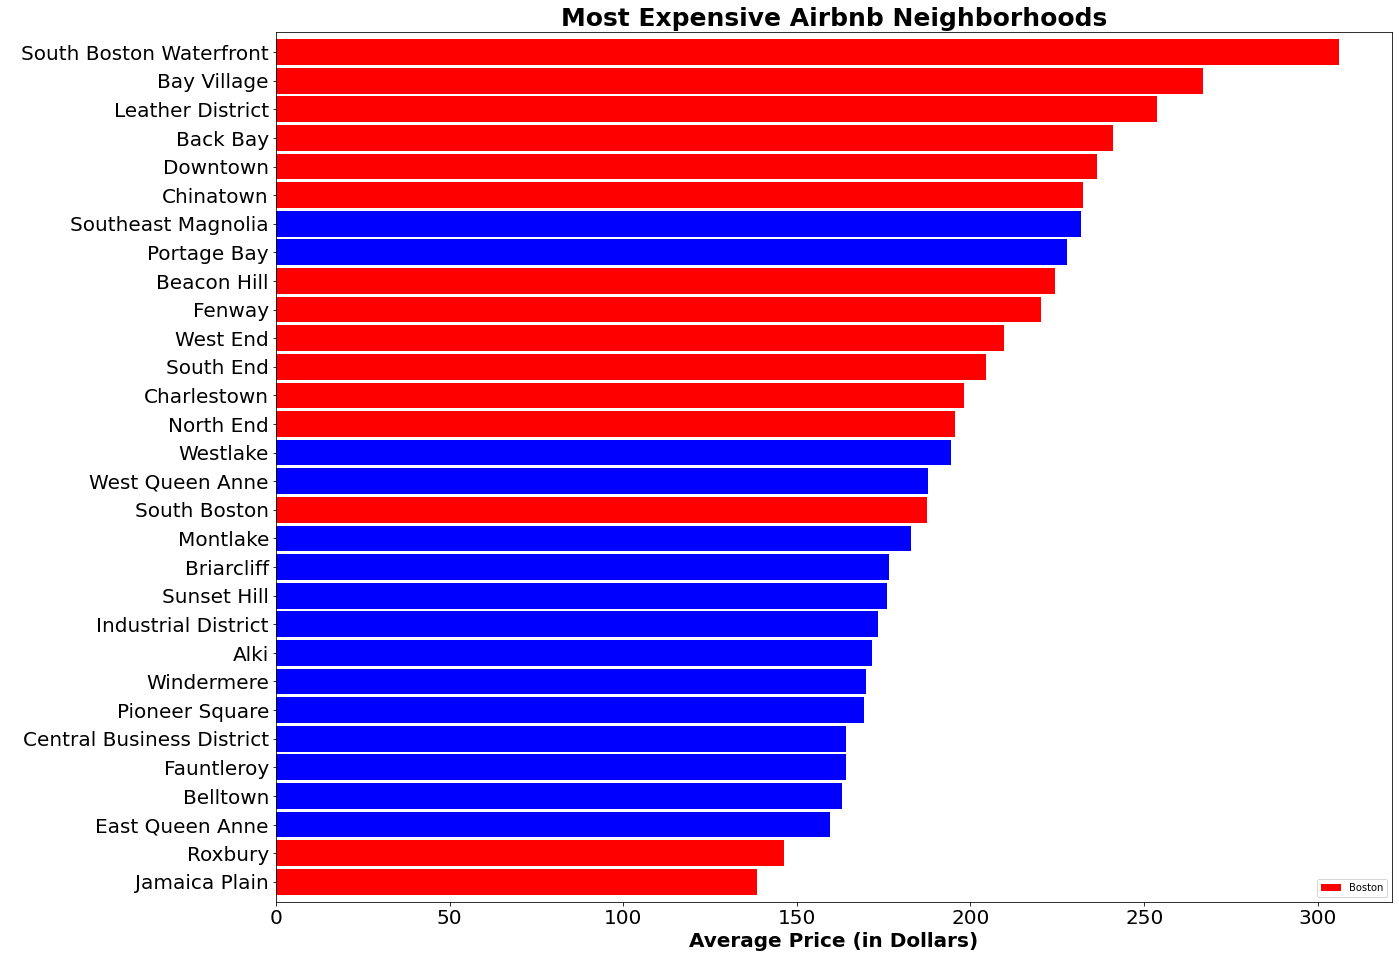

In [47]:
## Creating a horizontal bar chart of the Top 15 most expensive Airbnb Neighborhoods
## in Boston (in red for the Red Sox!) and in Seattle (in blue for the Mariners!)

col = []
for val in neigh_merged['city']:
    if val == 'Boston':
        col.append('red')
    if val == 'Seattle':
        col.append('blue')
exp_neigh = neigh_merged.plot(x="neighbourhood_cleansed", y="price", color=col,kind="barh", figsize=(20,16), width= 0.9)
exp_neigh.set_title( "Most Expensive Airbnb Neighborhoods", fontsize= 25, fontweight='bold')
exp_neigh.set_xlabel( "Average Price (in Dollars)", fontsize = 20, fontweight='bold')
plt.xticks(fontsize = 20)
exp_neigh.set_ylabel( " ", fontweight='bold')
plt.yticks(fontsize = 20)
exp_neigh.legend(labels= ['Boston', 'Seattle'])

# Answer to the Question: 
## It appears that Boston has more expensive neighborhoods overall than Seattle (the entire Top 6 of both cities).  These neighborhoods appear to be associated with water (South Boston Waterfront, Bay Village, Back Bay, even Portage Bay in Seattle).  
## Boston has nearly 10 neighborhoods averaging above 200 dollars a night, while Seattle only has 2.   

## 2. Which of the most expensive Airbnb neighborhoods have the best reviewed properties between Boston and Seattle?

In [48]:
## Looking at the merged Top 30 neighborhood dataset
neigh_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Jamaica Plain to South Boston Waterfront
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      30 non-null     float64
 1   host_id                 30 non-null     float64
 2   latitude                30 non-null     float64
 3   longitude               30 non-null     float64
 4   price                   30 non-null     float64
 5   number_of_reviews       30 non-null     float64
 6   review_scores_rating    30 non-null     float64
 7   neighbourhood_cleansed  30 non-null     object 
 8   city                    30 non-null     object 
dtypes: float64(7), object(2)
memory usage: 2.3+ KB


In [49]:
## Sorting the dataset by review scores rating
neigh_merged2 = neigh_merged.sort_values(["review_scores_rating"], ascending=False)

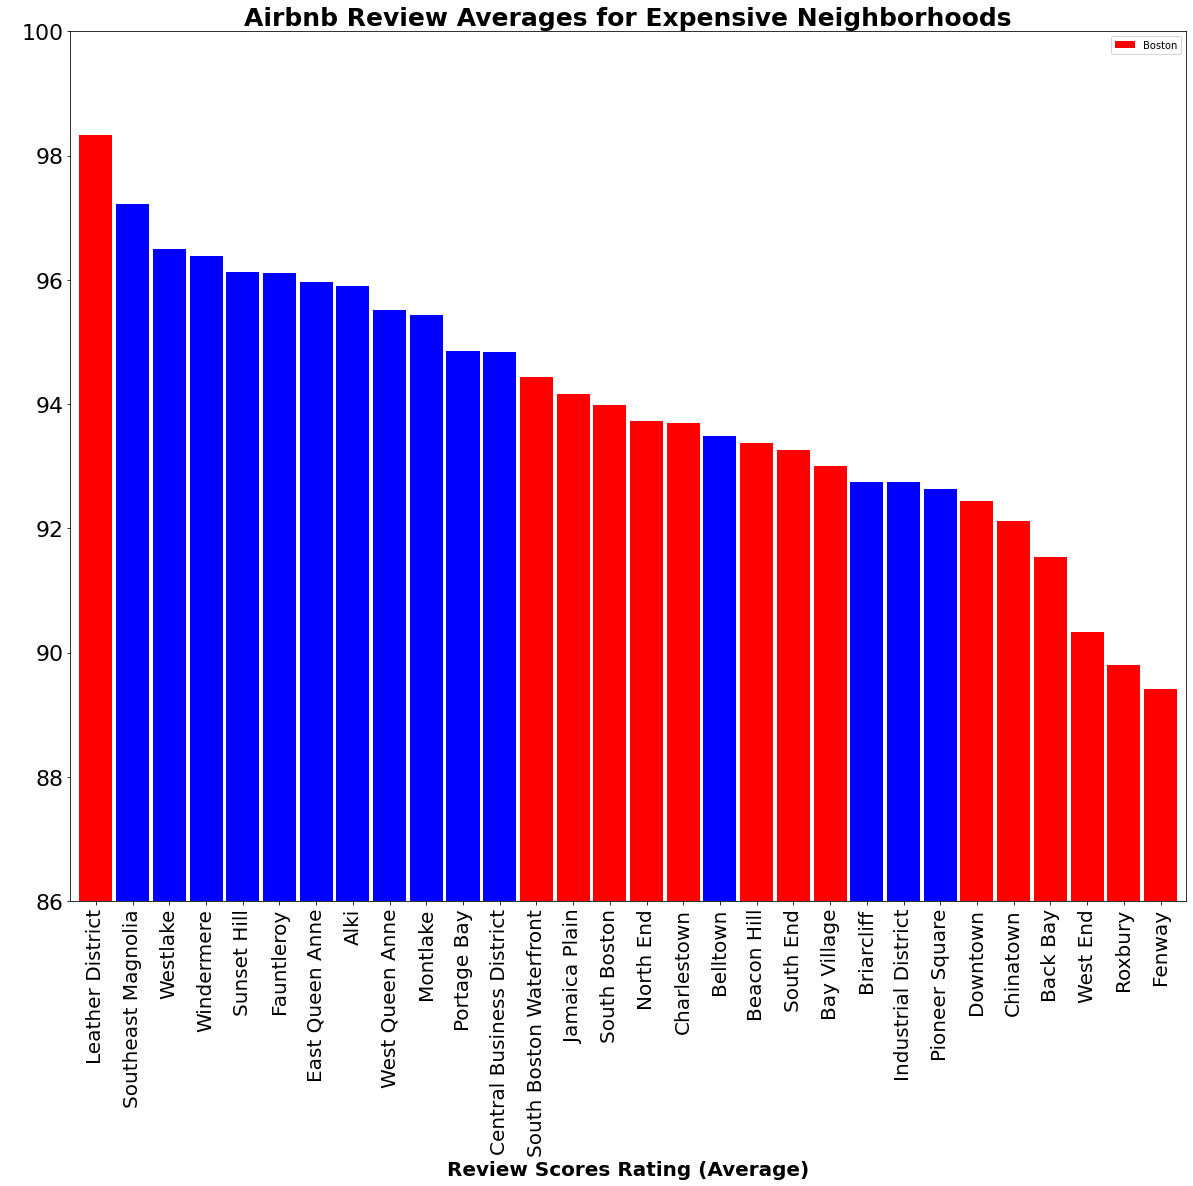

In [52]:
## Showing the review averages for the Top 30 Boston/Seattle dataset (Boston in red, 
## Seattle in blue).

col = []
for val in neigh_merged2['city']:
    if val == 'Boston':
        col.append('red')
    if val == 'Seattle':
        col.append('blue')
exp_neigh = neigh_merged2.plot(x="neighbourhood_cleansed", y="review_scores_rating", color=col,kind="bar", figsize=(20,16), width= 0.9)
exp_neigh.set_title( "Airbnb Review Averages for Expensive Neighborhoods", fontsize= 25, fontweight='bold')
exp_neigh.set_xlabel( "Review Scores Rating (Average)", fontsize= 20, fontweight='bold')
plt.xticks(fontsize = 20)
exp_neigh.set_ylabel( " ", fontweight='bold')
plt.yticks(fontsize = 22)
exp_neigh.set_ylim (86, 100)
exp_neigh.legend (labels= ['Boston', 'Seattle'])




# Answer to Question 2:
## Even though Boston seems to have the more expensive neighborhoods as compared to Seattle, Seattle actually has 11 of the 12 best reviewed neighborhoods among the 30 most expensive.  
## Leather District in Boston actually has the best reviews, and it is the third most expensive neighborhood among the 30 (As seen in the previous question's bar chart).  

# Question 3: Which city has more Airbnb reviews, the best overall reviews, and the highest average prices?

In [56]:
## Looking at df_merged to see about dropping all number of reviews entries that are "0"
df_merged

,id,host_id,host_name,neighbourhood_cleansed,city,latitude,longitude,price,number_of_reviews,review_scores_rating
0,12147973,31303940,Virginia,Roslindale,Boston,42.282619,-71.133068,250.0,0,NaN
1,3075044,2572247,Andrea,Roslindale,Boston,42.286241,-71.134374,65.0,36,94.0
2,6976,16701,Phil,Roslindale,Boston,42.292438,-71.135765,65.0,41,98.0
3,1436513,6031442,Meghna,Roslindale,Boston,42.281106,-71.121021,75.0,1,100.0
4,7651065,15396970,Linda,Roslindale,Boston,42.284512,-71.136258,79.0,29,99.0
...,...,...,...,...,...,...,...,...,...,...
7398,8101950,31148752,Bo,Fremont,Seattle,47.664295,-122.359170,359.0,1,80.0
7399,8902327,46566046,Glen,Portage Bay,Seattle,47.649552,-122.318309,79.0,2,100.0
7400,10267360,52791370,Virginia,Rainier Beach,Seattle,47.508453,-122.240607,93.0,0,NaN
7401,9604740,25522052,Karen,Madison Park,Seattle,47.632335,-122.275530,99.0,0,NaN


In [57]:
## Dropping "number_of_reviews" that equal 0 to create "reviews"
drop_A= df_merged.index[df_merged["number_of_reviews"] == 0].tolist()
reviews = df_merged.drop(df_merged.index[drop_A])

In [58]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6020 entries, 1 to 7399
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6020 non-null   int64  
 1   host_id                 6020 non-null   int64  
 2   host_name               6020 non-null   object 
 3   neighbourhood_cleansed  6020 non-null   object 
 4   city                    6020 non-null   object 
 5   latitude                6020 non-null   float64
 6   longitude               6020 non-null   float64
 7   price                   6020 non-null   float64
 8   number_of_reviews       6020 non-null   int64  
 9   review_scores_rating    5943 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 517.3+ KB


In [59]:
## Dropping all the Naan values from review_scores_rating
reviews = reviews.dropna()

In [60]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 1 to 7399
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5943 non-null   int64  
 1   host_id                 5943 non-null   int64  
 2   host_name               5943 non-null   object 
 3   neighbourhood_cleansed  5943 non-null   object 
 4   city                    5943 non-null   object 
 5   latitude                5943 non-null   float64
 6   longitude               5943 non-null   float64
 7   price                   5943 non-null   float64
 8   number_of_reviews       5943 non-null   int64  
 9   review_scores_rating    5943 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 510.7+ KB


In [61]:
## Making sure all the cities say either "Seattle" or "Boston"
reviews['city'] = reviews['city'].mask(reviews['city'].ne('Seattle'),'Boston')

In [62]:
## Success!
reviews['city'].value_counts()

Seattle    3171
Boston     2772
Name: city, dtype: int64

In [63]:
## Creating reviews_2 to keep "city" within the new grouped dataset 
reviews_2 = reviews.groupby(by=['neighbourhood_cleansed', 'city']).sum()

In [64]:
reviews_2

,,id,host_id,latitude,longitude,price,number_of_reviews,review_scores_rating
neighbourhood_cleansed,city,,,,,,,
Adams,Seattle,270848360,913507465,2717.270430,-6976.056694,7451.0,1948,5435.0
Alki,Seattle,146807856,434199171,1332.111546,-3427.424576,4305.0,550,2685.0
Allston,Boston,1620003490,4683032132,7708.446627,-12945.973985,19186.0,2982,16410.0
Arbor Heights,Seattle,11884570,29697872,142.530435,-367.144419,354.0,46,294.0
Atlantic,Seattle,211383108,717003948,1998.996429,-5136.840446,4655.0,1165,4004.0
...,...,...,...,...,...,...,...,...
West Woodland,Seattle,235283133,702187194,2574.141968,-6607.814017,6521.0,2172,5139.0
Westlake,Seattle,50825118,232668765,476.315578,-1223.421254,2128.0,81,965.0
Whittier Heights,Seattle,109230967,365383215,1144.383849,-2936.919685,2885.0,1308,2320.0


In [65]:
## Resetting the index so that neighborhood and city are not indexes and can be 
## part of visualizations.

new_reviews = reviews_2.reset_index()
print(new_reviews)

    neighbourhood_cleansed     city          id     host_id     latitude  \
0                    Adams  Seattle   270848360   913507465  2717.270430   
1                     Alki  Seattle   146807856   434199171  1332.111546   
2                  Allston   Boston  1620003490  4683032132  7708.446627   
3            Arbor Heights  Seattle    11884570    29697872   142.530435   
4                 Atlantic  Seattle   211383108   717003948  1998.996429   
..                     ...      ...         ...         ...          ...   
107          West Woodland  Seattle   235283133   702187194  2574.141968   
108               Westlake  Seattle    50825118   232668765   476.315578   
109       Whittier Heights  Seattle   109230967   365383215  1144.383849   
110             Windermere  Seattle    33671347    37077393   381.361779   
111         Yesler Terrace  Seattle   113059298   335041443   761.679175   

        longitude    price  number_of_reviews  review_scores_rating  
0    -6976.056694

In [67]:
## new_reviews was created to look at the total number of reviews for each neighborhood
new_reviews

,neighbourhood_cleansed,city,id,host_id,latitude,longitude,price,number_of_reviews,review_scores_rating
0,Adams,Seattle,270848360,913507465,2717.270430,-6976.056694,7451.0,1948,5435.0
1,Alki,Seattle,146807856,434199171,1332.111546,-3427.424576,4305.0,550,2685.0
2,Allston,Boston,1620003490,4683032132,7708.446627,-12945.973985,19186.0,2982,16410.0
3,Arbor Heights,Seattle,11884570,29697872,142.530435,-367.144419,354.0,46,294.0
4,Atlantic,Seattle,211383108,717003948,1998.996429,-5136.840446,4655.0,1165,4004.0
...,...,...,...,...,...,...,...,...,...
107,West Woodland,Seattle,235283133,702187194,2574.141968,-6607.814017,6521.0,2172,5139.0
108,Westlake,Seattle,50825118,232668765,476.315578,-1223.421254,2128.0,81,965.0
109,Whittier Heights,Seattle,109230967,365383215,1144.383849,-2936.919685,2885.0,1308,2320.0
110,Windermere,Seattle,33671347,37077393,381.361779,-978.181554,1284.0,89,771.0


In [68]:
## new_reviews_2 sorts new_reviews by which neighborhoods have the most reviews then descending.
new_reviews_2 = new_reviews.sort_values("number_of_reviews", ascending=False)

In [69]:
new_reviews_2

,neighbourhood_cleansed,city,id,host_id,latitude,longitude,price,number_of_reviews,review_scores_rating
47,Jamaica Plain,Boston,1907135017,5280509540,12481.919863,-20977.512480,40205.0,9052,27777.0
14,Broadway,Seattle,1608681704,4833799707,15286.342390,-39265.138409,39339.0,8917,30119.0
22,Dorchester,Boston,1548132808,4760502611,9518.414952,-15988.971341,20672.0,7387,20088.0
93,South End,Boston,1947944772,5589353569,11347.719896,-19047.766229,55710.0,5709,24995.0
25,East Boston,Boston,1165918052,3362592744,5762.919980,-9660.151815,16161.0,5502,12277.0
...,...,...,...,...,...,...,...,...,...
42,Holly Park,Seattle,19255893,63450090,190.155936,-489.148886,458.0,59,368.0
3,Arbor Heights,Seattle,11884570,29697872,142.530435,-367.144419,354.0,46,294.0
95,South Park,Seattle,4589654,23792018,47.526680,-122.316036,105.0,15,88.0
77,Pinehurst,Seattle,24191903,47883897,190.865873,-489.274956,469.0,10,357.0


In [70]:
## new_reviews_3 creates a total sum of reviews for each city
new_reviews_3 = new_reviews.groupby(by = ['city']).sum()

In [71]:
new_reviews_3

,id,host_id,latitude,longitude,price,number_of_reviews,review_scores_rating
city,,,,,,,
Boston,21142288064,63410591560,117364.200306,-197044.063202,462049.0,68210,254793.0
Seattle,15911292918,45571980746,151030.557933,-387917.530984,402091.0,84829,299784.0


In [72]:
## Creating the index "city" as another column to be used in visualizations
new_reviews_3['city'] = new_reviews_3.index

In [73]:
new_reviews_3

,id,host_id,latitude,longitude,price,number_of_reviews,review_scores_rating,city
city,,,,,,,,
Boston,21142288064,63410591560,117364.200306,-197044.063202,462049.0,68210,254793.0,Boston
Seattle,15911292918,45571980746,151030.557933,-387917.530984,402091.0,84829,299784.0,Seattle


In [74]:
## reviews_3 created to look at the average price, number of reviews, and review scores
## total for all of Boston and all of Seattle.
reviews_3 =  reviews.groupby(by = ['city']).mean()

In [75]:
reviews_3

,id,host_id,latitude,longitude,price,number_of_reviews,review_scores_rating
city,,,,,,,
Boston,7.627088e+06,2.287539e+07,42.339178,-71.083717,166.684343,24.606782,91.916667
Seattle,5.017752e+06,1.437149e+07,47.628684,-122.332870,126.802586,26.751498,94.539262


In [76]:
## Making "city" a column to be used in visualizations
reviews_3['city'] = reviews_3.index

Text(0.5, 1.0, 'Most Airbnb Reviews by City')

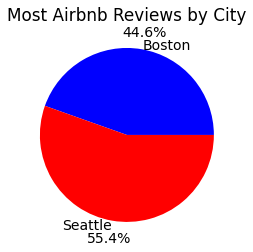

In [78]:
## Creating a pie chart to compare total number of reviews between Boston and Seattle
## Boston has 68,210 (44.6%) and Seattle has 84,829 (55.4%)

plt.rcParams['font.size'] = 14.0

labels = new_reviews_3['city']
sizes = new_reviews_3['number_of_reviews']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors = ('b', 'r'), autopct='%1.1f%%',
       pctdistance=1.2, labeldistance= 1.05)

ax.set_title('Most Airbnb Reviews by City')




[Text(0, 0, 'Boston'), Text(0, 0, 'Seattle')]

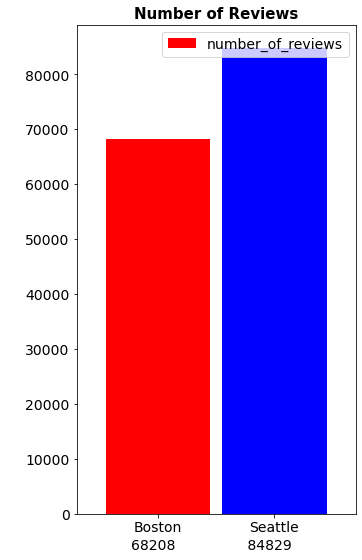

In [79]:
## Another way of looking at number of reviews with a bar chart.
color = ('r', 'b')
total = new_reviews_3.plot(x="city", y="number_of_reviews", kind="bar",figsize=(5,9), width= 0.9, color=color)
total.set_title( "Number of Reviews", fontsize= 15, fontweight='bold')
total.set_xlabel( "68208                84829  ")
total.set_ylabel( " ")
total.set_xticklabels(labels= ['Boston', 'Seattle'], rotation=0)

## Answer to Question 3a: Seattle has more overall reviews than Boston

In [518]:
reviews_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Boston to Seattle
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2 non-null      float64
 1   host_id               2 non-null      float64
 2   latitude              2 non-null      float64
 3   longitude             2 non-null      float64
 4   price                 2 non-null      float64
 5   number_of_reviews     2 non-null      float64
 6   review_scores_rating  2 non-null      float64
 7   city                  2 non-null      object 
dtypes: float64(7), object(1)
memory usage: 144.0+ bytes


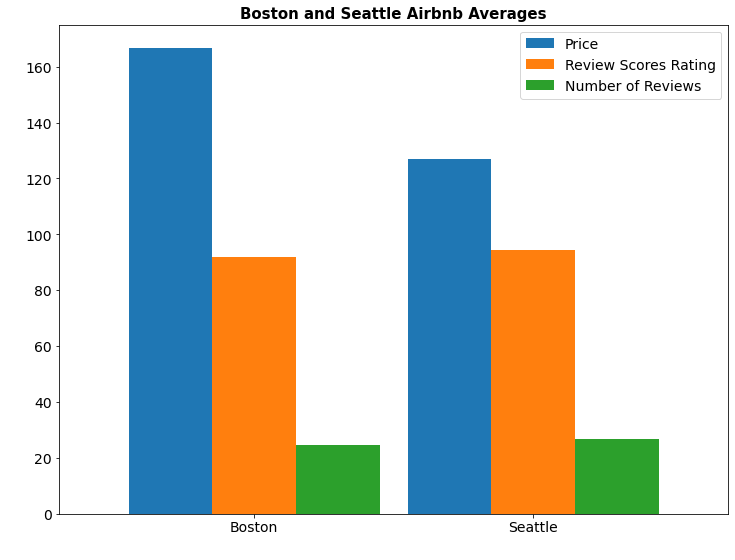

In [522]:
rev = reviews_3.plot(x="city", y=["price", "review_scores_rating", "number_of_reviews"], kind="bar",figsize=(12,9), width= 0.9)
rev.set_title( "Boston and Seattle Airbnb Averages", fontsize= 15, fontweight='bold')
rev.set_xlabel( " ")
rev.set_ylabel( " ")
rev.set_xticklabels(labels= ['Boston', 'Seattle'], rotation=0)
rev.legend(labels= ['Price', 'Review Scores Rating','Number of Reviews'])

In [80]:
df_merged.to_csv('/Users/seanward/Desktop/UDACITY/Data Science Project/Cleaned Data Sets/df_merged.csv', index=False)

In [81]:
neigh_merged.to_csv('/Users/seanward/Desktop/UDACITY/Data Science Project/Cleaned Data Sets/neigh_merged.csv', index=False)

In [82]:
neigh_merged2.to_csv('/Users/seanward/Desktop/UDACITY/Data Science Project/Cleaned Data Sets/neigh_merged2.csv', index=False)

In [83]:
new_reviews_3.to_csv('/Users/seanward/Desktop/UDACITY/Data Science Project/Cleaned Data Sets/new_reviews_3.csv', index=False)

In [84]:
reviews_3.to_csv('/Users/seanward/Desktop/UDACITY/Data Science Project/Cleaned Data Sets/reviews_3.csv', index=False)

## Answer to 3b and 3c: Boston has a much higher average price (about 167 dollars to 127 dollars for Seattle).  
## Seattle has a slightly higher average review scores rating (94.5% to 91.9% for Boston).  
## Seattle also has a higher average number of reviews per property (26.8 to 24.6).

# Final Conclusions: 
## In terms of expense, Boston is a more expensive city for lodging through Airbnb.  It's a big difference both in all Airbnb properties (167 to 127 for Seattle), and in the fact that 10 Boston neighborhoods average over 200 dollars, while only 2 Seattle neighborhoods average that high.

## In terms of the reviews of the most expensive neighborhoods, Seattle thrives with better reviews.  11 of 12 of the best reviewed expensive neighborhoods are in Seattle. 

## Also, Seattle's 94.5% rating for all reviewed Airbnb properties far exceeeds Boston's 91.9% average.  This is a significant difference when it comes to reviews.

## Seattle has far more total reviews than Boston (84,829 to Boston's 68,208).  My theory is that because Airbnb was started on the west coast (San Francisco in 2008), it is more established in Seattle than it is in Boston.  

## Also of interest: They are very similar in population (726,000 in Seattle, 672,800 in Boston as per https://www.bestplaces.net/compare-cities/seattle_wa/boston_ma/people) but Seattle takes up far more space (almost twice as much with 84 square miles as compared to Boston's 48.3 square miles as per https://www.quora.com/Is-Seattle-bigger-than-Boston-Is-it-how-much-bigger ).  This also explains why Seattle has far more neighborhoods than Boston.